In [92]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from deap import creator, base, tools, algorithms

data = pd.read_csv(r"C:\Users\cmebr\Desktop\110BProj1\large1.csv")
sudoku0 = data['quizzes'][0]
sol0 = data['solutions'][0]

#Define an encoded list of the fixed values for all of our games.
allFixedValues = []
for n in range(len(data['quizzes'])):
    fixedValue = []
    quiz = np.reshape([int(c) for c in data['quizzes'][n]], (9,9))
    for i in range(9):
        for j in range(9):
            if quiz[i][j] != 0:
                fixedValue.append([quiz[i][j], i, j])
    allFixedValues.append(np.array(fixedValue))        
        
sols = []
for n in range(len(data['solutions'])):
    sols.append(np.reshape([int(c) for c in data['solutions'][n]], (9,9)))

In [118]:
def printBoard(board):
    for i in range(len(board)):
        if(i % 3 == 0 and i != 0):
            print("------+------+------")
        for j in range(len(board[i])):
            if(j % 3 == 0 and j != 0):
                sys.stdout.write("|")
            sys.stdout.write(str(board[i][j]) + " ")
        print("")

def printBoardFromDNA64(individual):
    board = buildBoardFromDNA64(individual)
    printBoard(board)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("pos_val", random.randint, 1, 9)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.pos_val, n=64)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def fitnessFromDNA64(individual, solution):
    board = buildBoardFromDNA64(individual)
    return fitnessFromBoard(board, solution),

def buildBoardFromDNA64(individual):
    flattenedIdx = list(map(lambda t: t[1]*9 + t[2], fixedValues))
    values = fixedValues.T[0]
    flatBoard = []
    fixedValuesCounter = 0
    for i in range(81):
        if(i in flattenedIdx):
            flatBoard.append(values[fixedValuesCounter])
            fixedValuesCounter += 1
            continue
        flatBoard.append(individual[i - fixedValuesCounter])
    return np.array(flatBoard).reshape(9,9)


#def fitnessFromBoard(board, solution):
#    score = 0
#    rows, cols = board.shape
#    for row in board:
#        print(row)
#        score += len(np.unique(row))
#    for col in board.T:
#        score += len(np.unique(col))
#    for i in range(0, 3):
#        for j in range(0, 3):
#            sub = board[3*i:3*i+3, 3*j:3*j+3]
#            score += len(np.unique(sub))
#    return score

def fitnessFromBoard(board, solution):
    solution = np.reshape(solution, (9,9))
    score = 0
    rows, cols = board.shape
    for i in range(rows):
        score += np.sum(board[i]==solution[i])
        for j in range(cols):
            score += np.sum(board[i][j]==solution[i][j])
    for i in range(0, 3):
        for j in range(0, 3):
            sub1 = board[3*i:3*i+3, 3*j:3*j+3]
            sub2 = solution[3*i:3*i+3, 3*j:3*j+3]
            score += np.sum(sub1 != sub2)
    return score
    
toolbox.register("evaluate", fitnessFromDNA64)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=9, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("select", tools.selBest, k = 300)

C:\Users\cmebr\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\cmebr\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [94]:
import time

population = toolbox.population(n=100)

fixedValues = allFixedValues[0]

# stats = tools.Statistics(lambda ind: ind.fitness.values)
# stats.register("avg", np.mean)
# stats.register("std", np.std)
# stats.register("min", np.min)
# stats.register("max", np.max)
gensMin = []
gensMax = []
gensAvg = []
gensStd = []

start = time.time()

NGEN=100
for gen in range(NGEN):
	print("---GEN %i ---" % gen)
	offspring = algorithms.varAnd(population, toolbox, cxpb=0.8, mutpb=0.2)
	fits = toolbox.map(toolbox.evaluate, offspring, solution)
	for fit, ind in zip(fits, offspring):
		ind.fitness.values = fit
	
	# Gather all the fitnesses in one list and print the stats
	fits = [ind.fitness.values[0] for ind in offspring]
	# print(list(fits))

	length = len(population)
	mean = sum(fits) / length
	sum2 = sum(x*x for x in fits)
	std = abs(sum2 / length - mean**2)**0.5

	gensMin.append(min(fits))
	gensMax.append(max(fits))
	gensAvg.append(mean)
	gensStd.append(std)

	# print("  Min %s" % int(min(fits)))
	print("  Max %s" % int(max(fits)))
	# print("  Avg %s" % mean)
	# print("  Std %s" % std)
	population = toolbox.select(offspring, k=len(population))
topk = tools.selBest(population, k=1)
#print(top10)
for solution in topk:
	print("Pontos: %i/243" % int(fitnessFromDNA64(solution)[0]))
	printBoardFromDNA64(solution)
	print(sols[0])
	print("")
    
end = time.time()
print("Total Time: {t:6.2f} secs.".format(t=(end-start)))

---GEN 0 ---


IndexError: tuple index out of range

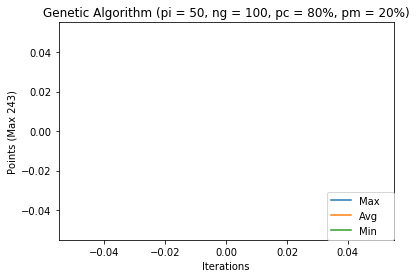

In [49]:
plt.subplot(111)
plt.plot(gensMax, label="Max")
plt.plot(gensAvg, label="Avg")
plt.plot(gensMin, label="Min")
plt.legend(bbox_to_anchor=(0.8, 0.0, 0.2, .102), loc=3, ncol=1, mode="expand", borderaxespad=0.)
plt.title('Genetic Algorithm (pi = 50, ng = 100, pc = 80%, pm = 20%)')
plt.ylabel('Points (Max 243)')
plt.xlabel('Iterations')
plt.show()

In [119]:
data = pd.read_csv(r"C:\Users\cmebr\Desktop\110BProj1\small2.csv")

allFixedValues = []
for n in range(len(data['quizzes'])):
    fixedValue = []
    quiz = np.reshape([int(c) for c in data['quizzes'][n]], (9,9))
    for i in range(9):
        for j in range(9):
            if quiz[i][j] != 0:
                fixedValue.append([quiz[i][j], i, j])
    allFixedValues.append(np.array(fixedValue))
    
sols = []
for n in range(len(data['solutions'])):
    sols.append(np.reshape([int(c) for c in data['solutions'][n]], (1,9**2)))
print(sols[0])
    
    
#for n in range(100):
randFixed = []
n = np.random.randint(0,1011,100)
for i in n:
    randFixed.append(allFixedValues[i])

[[7 9 4 5 8 2 1 3 6 2 6 8 9 3 1 7 4 5 3 1 5 4 7 6 9 8 2 6 8 9 7 1 5 3 2 4
  4 3 2 8 6 9 5 7 1 1 5 7 2 4 3 8 6 9 8 2 1 6 5 7 4 9 3 9 4 3 1 2 8 6 5 7
  5 7 6 3 9 4 2 1 8]]


In [120]:
import time

scores = []
corr = 0

population = toolbox.population(n=100)

allMin = []
allMax = []
allAvg = []
allStd = []

for i in range(len(randFixed)):
#    fixedValues = allFixedValues[i]
    solution = sols[i]
    fixedValues = randFixed[i]

# stats = tools.Statistics(lambda ind: ind.fitness.values)
# stats.register("avg", np.mean)
# stats.register("std", np.std)
# stats.register("min", np.min)
# stats.register("max", np.max)
    gensMin = []
    gensMax = []
    gensAvg = []
    gensStd = []

    start = time.time()

    NGEN=100
    for gen in range(NGEN):
        #print("---GEN %i ---" % gen)
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.8, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring, solution)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values for ind in offspring]
        fits = fits[0]
        # print(list(fits))

        length = len(population)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        gensMin.append(min(fits))
        gensMax.append(max(fits))
        gensAvg.append(mean)
        gensStd.append(std)

        # print("  Min %s" % int(min(fits)))
        #print("  Max %s" % int(max(fits)))
        # print("  Avg %s" % mean)
        # print("  Std %s" % std)
        population = toolbox.select(offspring, k=len(population))
    topk = tools.selBest(population, k=1)
    #print(top10)
    for sol in topk:
        print("Points: %i/243" % int(fitnessFromDNA64(sol, solution)[0]))
        printBoardFromDNA64(sol)
        print(np.reshape(sols[i],(9,9)))
        print("")
    
    allMin.append(gensMin)
    allMax.append(gensMax)
    allAvg.append(gensAvg)
    allStd.append(gensStd)
    tot = 243*(i+1)
    corr += int(fitnessFromDNA64(sol, solution)[0])
    scores.append(int(fitnessFromDNA64(sol, solution)[0]))
    end = time.time()
    print("Total Time: {t:6.2f} secs. Success rate: {corr} / {tot}.".format(t=(end-start),corr = corr, tot = tot))

Points: 88/243
5 2 2 |9 8 9 |3 1 6 
7 5 3 |8 3 2 |6 6 5 
1 9 5 |1 9 1 |8 5 2 
------+------+------
9 3 2 |6 7 2 |1 9 3 
9 7 5 |7 9 6 |2 3 6 
9 6 2 |5 4 6 |3 3 8 
------+------+------
1 4 8 |4 4 8 |9 2 8 
8 7 7 |4 6 1 |4 4 2 
2 5 2 |6 6 5 |7 6 3 
[[7 9 4 5 8 2 1 3 6]
 [2 6 8 9 3 1 7 4 5]
 [3 1 5 4 7 6 9 8 2]
 [6 8 9 7 1 5 3 2 4]
 [4 3 2 8 6 9 5 7 1]
 [1 5 7 2 4 3 8 6 9]
 [8 2 1 6 5 7 4 9 3]
 [9 4 3 1 2 8 6 5 7]
 [5 7 6 3 9 4 2 1 8]]

Total Time:   0.68 secs. Success rate: 88 / 243.
Points: 90/243
2 7 6 |7 9 9 |3 2 3 
2 7 8 |1 5 3 |8 9 1 
3 5 5 |8 7 9 |4 6 8 
------+------+------
3 2 7 |1 6 2 |9 9 5 
8 5 6 |2 4 7 |6 7 6 
2 2 2 |8 9 4 |8 3 7 
------+------+------
4 8 3 |5 9 3 |7 3 4 
2 4 7 |1 8 4 |4 2 8 
2 5 6 |6 5 1 |1 5 8 
[[2 4 9 1 8 6 5 7 3]
 [7 3 5 9 4 2 1 8 6]
 [1 6 8 3 7 5 4 2 9]
 [5 1 2 6 9 7 3 4 8]
 [9 7 6 8 3 4 2 5 1]
 [4 8 3 2 5 1 9 6 7]
 [6 9 4 7 2 3 8 1 5]
 [3 2 7 5 1 8 6 9 4]
 [8 5 1 4 6 9 7 3 2]]

Total Time:   0.73 secs. Success rate: 178 / 486.
Points: 92/243
4 9 6 |1 4 3

Points: 96/243
7 8 5 |3 4 4 |7 2 7 
2 9 4 |8 2 8 |8 1 4 
4 6 7 |2 9 2 |4 4 1 
------+------+------
5 3 2 |3 8 4 |5 9 2 
2 9 4 |5 3 6 |1 6 3 
7 8 2 |8 3 6 |8 5 3 
------+------+------
7 2 9 |1 8 8 |9 5 6 
7 6 3 |2 6 5 |9 7 9 
7 5 5 |2 8 4 |9 4 6 
[[5 6 9 1 4 3 2 8 7]
 [2 8 7 9 6 5 4 3 1]
 [4 1 3 8 7 2 6 9 5]
 [6 3 5 7 2 9 1 4 8]
 [8 7 2 5 1 4 9 6 3]
 [9 4 1 3 8 6 7 5 2]
 [3 2 6 4 5 7 8 1 9]
 [1 5 4 2 9 8 3 7 6]
 [7 9 8 6 3 1 5 2 4]]

Total Time:   0.73 secs. Success rate: 1637 / 4374.
Points: 91/243
6 6 1 |7 7 8 |8 7 8 
6 1 8 |2 4 2 |6 4 1 
7 9 4 |1 6 3 |8 7 6 
------+------+------
2 7 1 |7 5 8 |8 1 6 
1 8 6 |7 8 4 |1 2 1 
7 7 8 |3 2 4 |9 8 7 
------+------+------
2 7 5 |1 8 5 |3 6 6 
3 3 6 |5 7 4 |1 2 6 
6 4 6 |5 3 2 |4 3 2 
[[8 9 3 4 2 6 1 7 5]
 [4 2 6 5 7 1 3 9 8]
 [1 5 7 9 3 8 2 4 6]
 [5 1 2 7 8 9 6 3 4]
 [9 6 8 3 1 4 5 2 7]
 [7 3 4 2 6 5 9 8 1]
 [6 7 9 8 5 3 4 1 2]
 [2 4 1 6 9 7 8 5 3]
 [3 8 5 1 4 2 7 6 9]]

Total Time:   0.80 secs. Success rate: 1728 / 4617.
Points: 91/243
4 6 4 |

Points: 93/243
1 6 9 |4 1 5 |8 1 2 
2 8 4 |7 3 3 |9 1 7 
3 1 7 |2 1 7 |2 1 7 
------+------+------
3 6 9 |3 8 3 |9 5 8 
1 5 9 |9 6 1 |8 1 9 
7 2 3 |2 8 1 |7 3 1 
------+------+------
9 9 8 |8 1 7 |8 9 3 
6 1 2 |6 2 3 |1 4 7 
7 4 8 |3 1 4 |2 5 6 
[[7 1 3 4 6 9 8 5 2]
 [4 5 6 1 8 2 9 7 3]
 [8 9 2 3 7 5 6 1 4]
 [1 6 9 2 5 3 4 8 7]
 [2 7 4 8 9 1 5 3 6]
 [3 8 5 7 4 6 2 9 1]
 [5 4 1 9 2 7 3 6 8]
 [6 3 8 5 1 4 7 2 9]
 [9 2 7 6 3 8 1 4 5]]

Total Time:   0.81 secs. Success rate: 3188 / 8505.
Points: 92/243
7 9 9 |2 4 7 |7 6 5 
2 8 7 |2 4 9 |8 1 3 
8 2 4 |5 5 2 |4 1 5 
------+------+------
3 2 3 |9 7 2 |5 3 3 
9 6 3 |1 7 4 |8 8 4 
8 8 7 |2 2 9 |4 9 5 
------+------+------
9 8 1 |6 4 3 |9 9 2 
5 1 1 |9 9 5 |9 4 6 
2 2 9 |3 3 8 |9 7 2 
[[1 3 7 8 9 2 4 5 6]
 [2 8 9 6 4 5 7 3 1]
 [6 5 4 1 7 3 9 2 8]
 [8 6 3 7 2 1 5 4 9]
 [7 2 1 9 5 4 6 8 3]
 [9 4 5 3 6 8 2 1 7]
 [3 7 2 5 8 9 1 6 4]
 [4 1 6 2 3 7 8 9 5]
 [5 9 8 4 1 6 3 7 2]]

Total Time:   0.79 secs. Success rate: 3280 / 8748.
Points: 91/243
2 3 6 |

Points: 88/243
7 8 1 |7 9 1 |2 6 9 
4 4 3 |2 8 9 |4 3 2 
2 7 7 |4 6 8 |8 2 8 
------+------+------
6 6 9 |7 9 8 |7 4 5 
2 9 2 |2 7 9 |3 1 1 
3 2 3 |4 2 7 |7 9 7 
------+------+------
2 3 6 |2 1 8 |9 9 7 
4 4 4 |6 9 3 |4 1 4 
8 1 8 |9 9 4 |6 3 1 
[[9 4 5 8 3 2 1 7 6]
 [8 2 3 6 1 7 9 5 4]
 [7 1 6 5 4 9 8 3 2]
 [6 8 7 2 5 4 3 1 9]
 [3 5 1 9 6 8 2 4 7]
 [2 9 4 3 7 1 5 6 8]
 [5 7 2 1 8 6 4 9 3]
 [4 3 9 7 2 5 6 8 1]
 [1 6 8 4 9 3 7 2 5]]

Total Time:   0.69 secs. Success rate: 4804 / 12879.
Points: 86/243
9 6 7 |5 6 1 |3 4 2 
3 1 5 |2 3 8 |9 1 9 
5 2 4 |7 8 1 |9 6 8 
------+------+------
4 7 7 |7 9 2 |8 1 9 
2 6 3 |8 8 5 |3 9 4 
6 8 7 |6 8 5 |3 3 2 
------+------+------
1 6 6 |2 7 1 |9 6 5 
4 3 6 |2 1 1 |8 9 6 
9 4 6 |9 8 3 |5 2 6 
[[7 5 2 1 6 3 9 8 4]
 [4 9 8 5 2 7 1 3 6]
 [3 1 6 9 4 8 7 5 2]
 [5 7 9 8 1 6 2 4 3]
 [8 6 1 4 3 2 5 9 7]
 [2 4 3 7 5 9 8 6 1]
 [9 2 7 6 8 4 3 1 5]
 [1 8 4 3 7 5 6 2 9]
 [6 3 5 2 9 1 4 7 8]]

Total Time:   0.70 secs. Success rate: 4890 / 13122.
Points: 96/243
4 6 1

Points: 91/243
2 6 9 |9 2 2 |4 3 5 
5 5 4 |1 4 5 |9 1 8 
6 2 6 |3 6 5 |6 7 4 
------+------+------
8 8 7 |1 3 9 |3 2 1 
1 7 4 |4 5 6 |4 5 1 
9 6 3 |9 7 2 |3 3 9 
------+------+------
8 8 6 |9 9 4 |4 8 5 
4 9 4 |7 1 7 |3 3 3 
5 1 2 |2 5 7 |8 2 1 
[[9 4 1 8 2 6 5 7 3]
 [2 8 3 1 7 5 4 9 6]
 [7 6 5 4 9 3 1 2 8]
 [5 2 4 6 8 9 7 3 1]
 [3 1 6 7 4 2 8 5 9]
 [8 9 7 3 5 1 2 6 4]
 [6 5 8 2 3 4 9 1 7]
 [1 7 9 5 6 8 3 4 2]
 [4 3 2 9 1 7 6 8 5]]

Total Time:   0.70 secs. Success rate: 6321 / 17010.
Points: 91/243
2 5 4 |6 4 8 |4 5 3 
2 4 3 |5 3 2 |3 3 1 
5 6 8 |4 3 8 |3 8 9 
------+------+------
4 3 9 |2 8 1 |3 4 5 
6 3 3 |4 5 9 |6 3 8 
1 8 7 |1 9 2 |7 4 5 
------+------+------
7 5 9 |2 2 7 |1 9 2 
4 1 5 |4 8 4 |3 3 6 
3 8 2 |7 1 5 |5 4 1 
[[7 2 8 3 9 1 5 6 4]
 [5 6 3 2 4 8 1 9 7]
 [9 4 1 5 7 6 8 2 3]
 [1 3 2 7 8 5 9 4 6]
 [6 7 5 9 1 4 3 8 2]
 [8 9 4 6 3 2 7 1 5]
 [2 8 9 4 5 7 6 3 1]
 [3 5 6 1 2 9 4 7 8]
 [4 1 7 8 6 3 2 5 9]]

Total Time:   0.70 secs. Success rate: 6412 / 17253.
Points: 92/243
4 8 4

7 8 4 |4 7 8 |4 3 8 
3 7 1 |5 6 2 |2 9 1 
5 8 9 |4 7 4 |1 9 4 
------+------+------
9 2 2 |4 1 8 |6 6 1 
5 3 7 |1 5 3 |8 5 8 
3 5 6 |2 9 7 |1 5 8 
[[3 6 5 9 2 8 7 4 1]
 [4 1 7 6 5 3 2 8 9]
 [2 8 9 1 4 7 5 3 6]
 [6 7 4 5 9 1 8 2 3]
 [8 3 2 4 7 6 1 9 5]
 [5 9 1 3 8 2 6 7 4]
 [1 4 8 7 3 5 9 6 2]
 [9 2 6 8 1 4 3 5 7]
 [7 5 3 2 6 9 4 1 8]]

Total Time:   0.75 secs. Success rate: 7862 / 21141.
Points: 93/243
9 5 7 |8 8 9 |9 2 6 
3 2 5 |3 4 9 |3 8 2 
5 6 1 |2 6 9 |2 5 8 
------+------+------
9 1 7 |4 2 1 |1 7 3 
9 9 1 |4 9 5 |9 2 5 
5 7 9 |3 9 6 |2 3 1 
------+------+------
7 9 6 |1 4 6 |8 3 9 
2 2 3 |7 1 8 |4 8 2 
6 3 6 |5 2 6 |9 8 4 
[[3 7 2 8 6 4 1 5 9]
 [9 8 4 5 1 2 3 6 7]
 [6 1 5 9 3 7 8 2 4]
 [2 3 8 6 9 1 4 7 5]
 [7 4 9 3 2 5 6 8 1]
 [5 6 1 4 7 8 9 3 2]
 [4 2 6 1 5 3 7 9 8]
 [1 5 3 7 8 9 2 4 6]
 [8 9 7 2 4 6 5 1 3]]

Total Time:   0.69 secs. Success rate: 7955 / 21384.
Points: 92/243
7 1 8 |5 9 2 |6 8 2 
4 3 7 |2 3 3 |7 3 4 
5 3 3 |8 3 1 |3 5 9 
------+------+------
1 7 5 |5 8 9 |4 1 1 

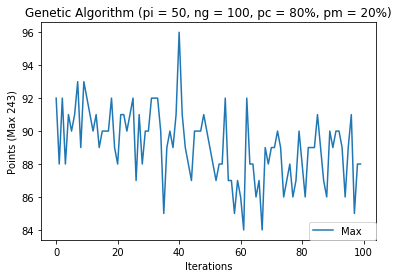

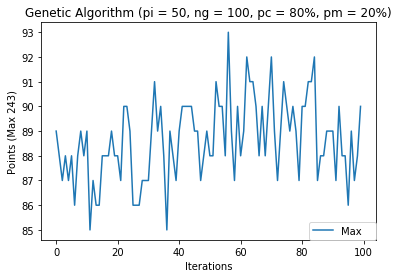

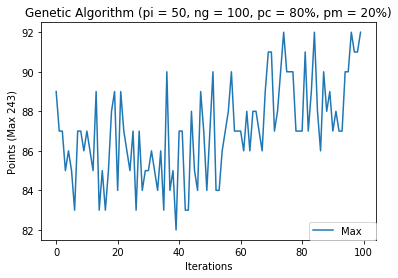

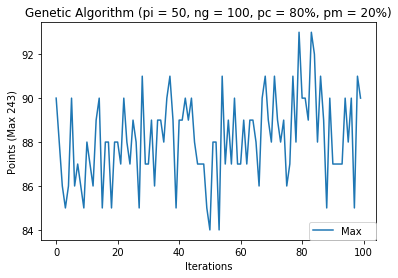

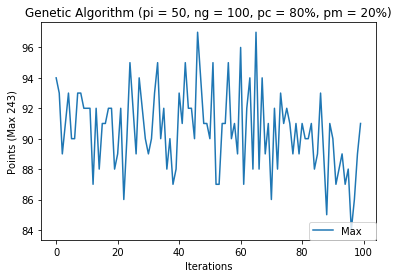

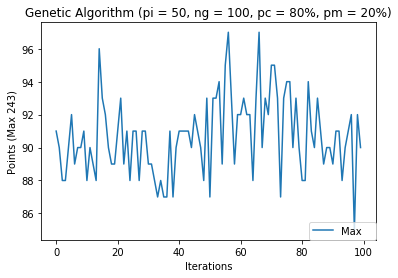

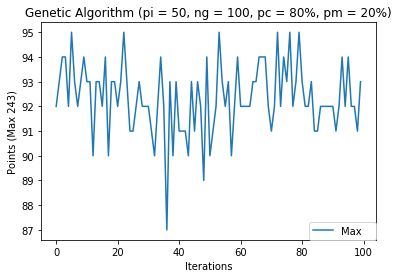

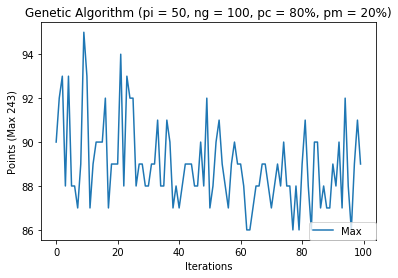

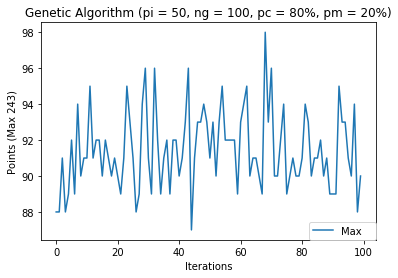

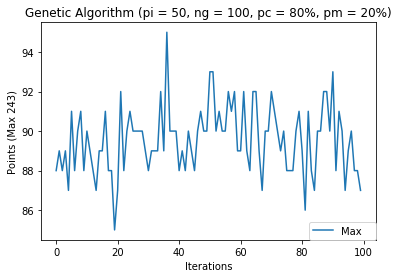

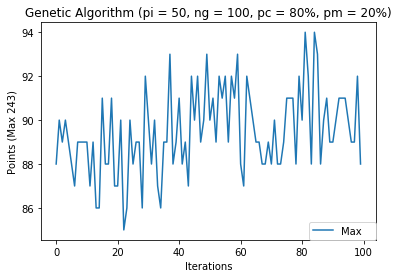

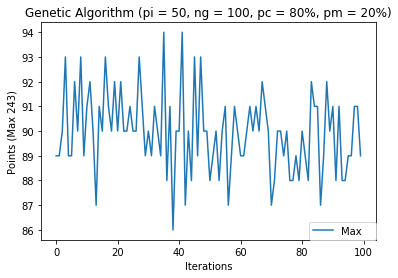

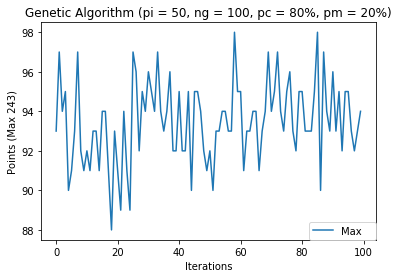

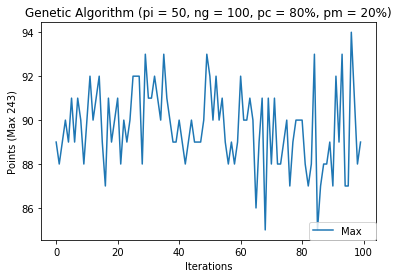

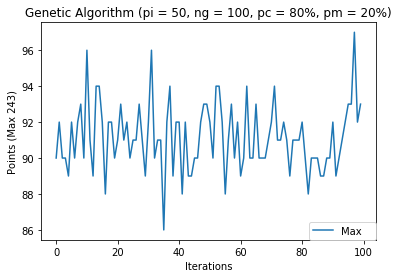

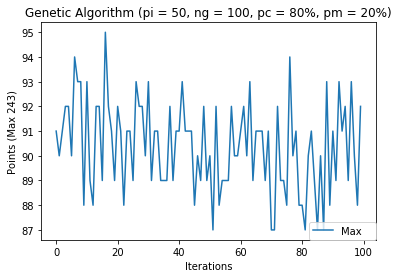

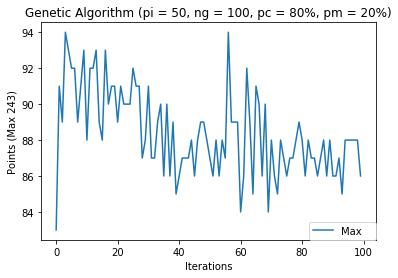

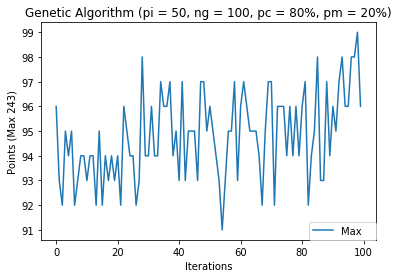

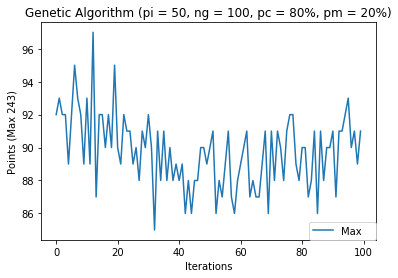

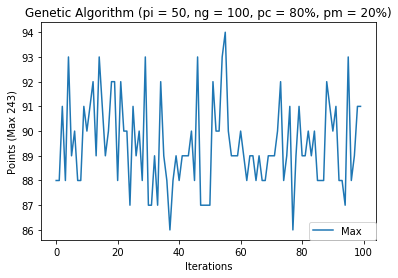

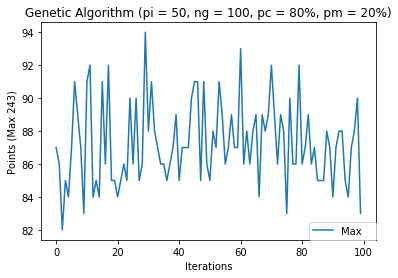

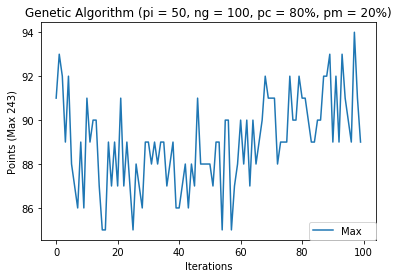

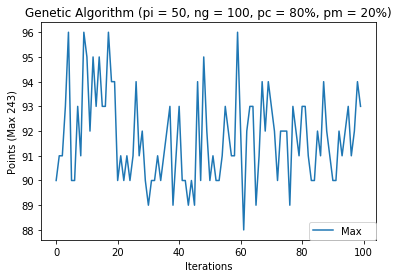

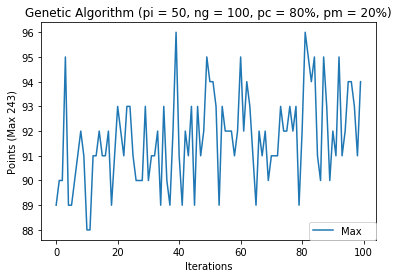

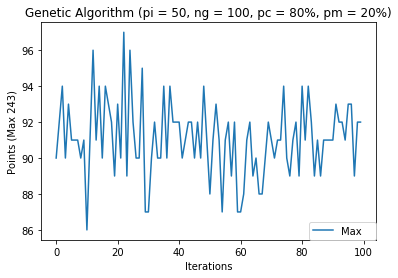

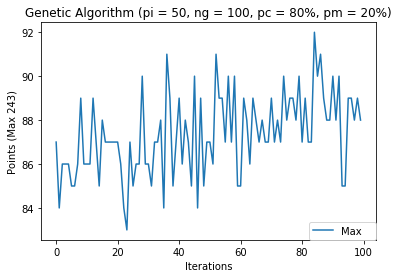

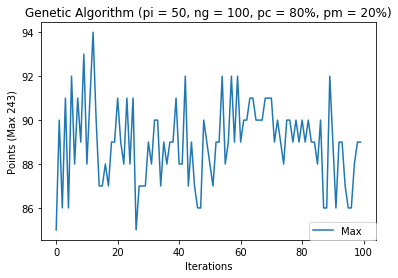

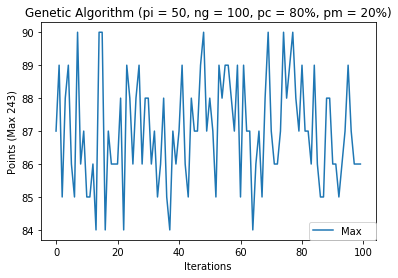

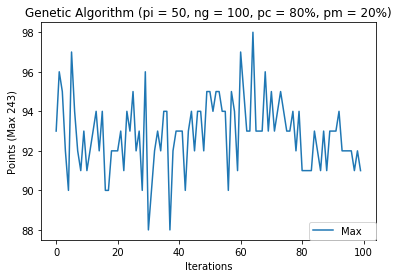

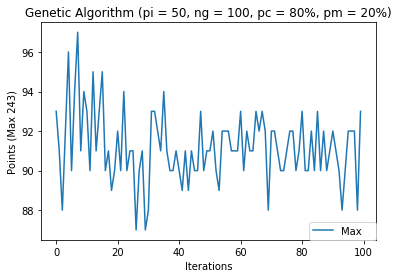

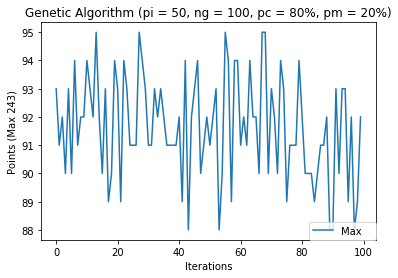

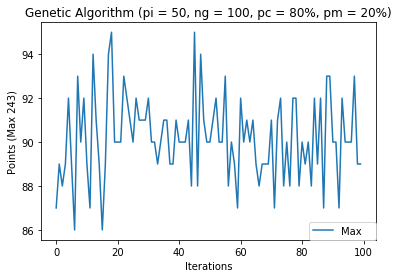

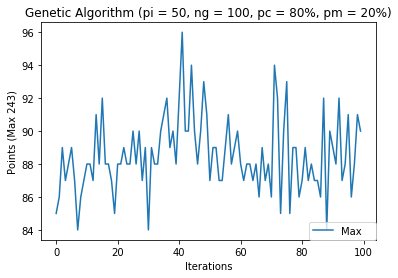

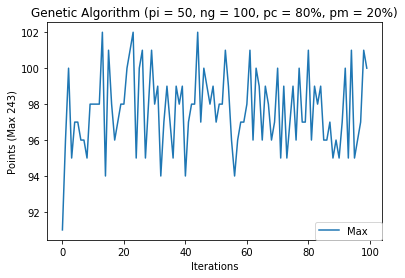

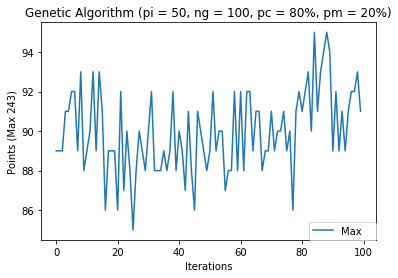

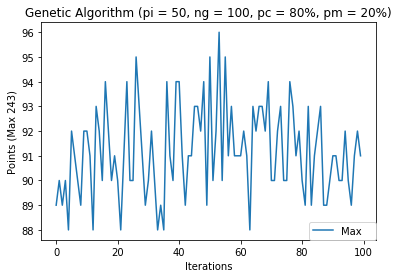

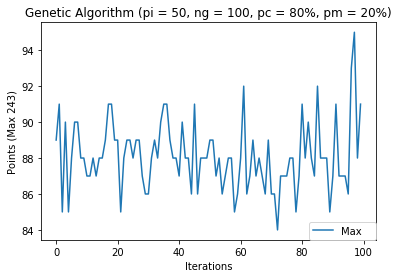

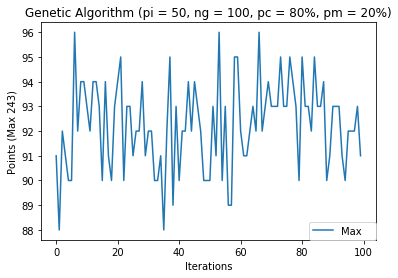

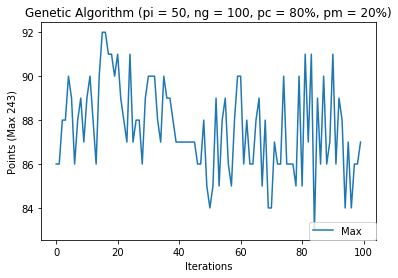

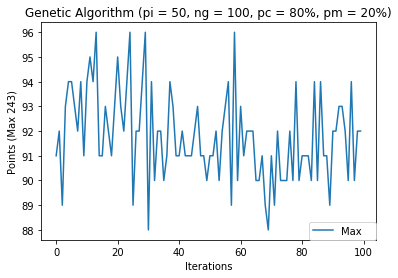

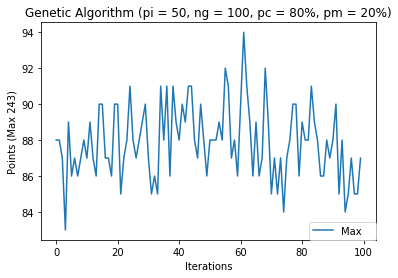

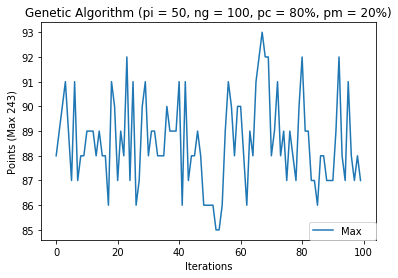

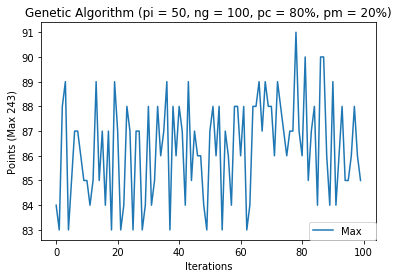

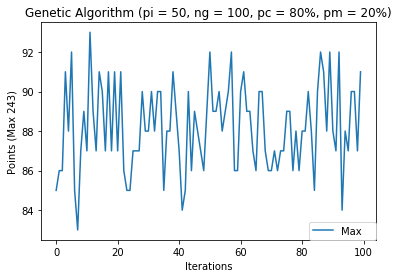

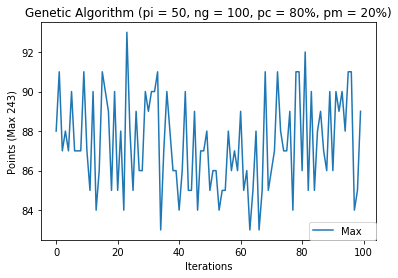

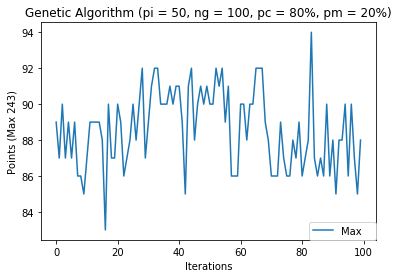

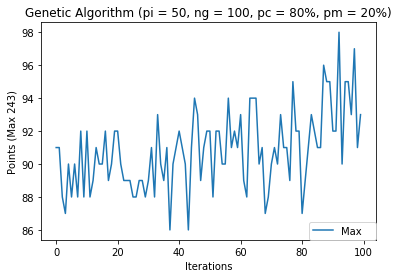

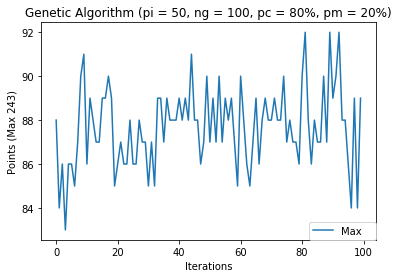

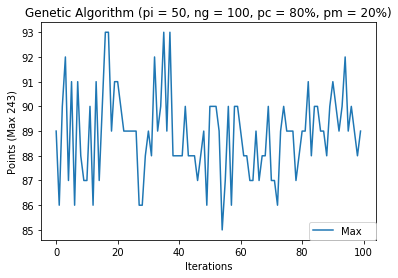

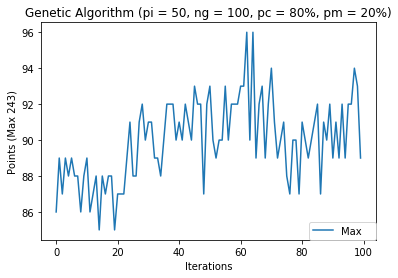

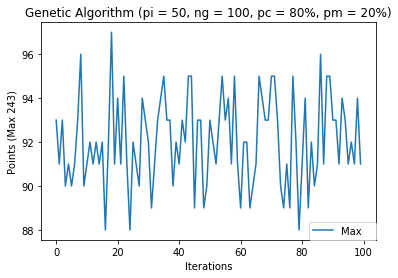

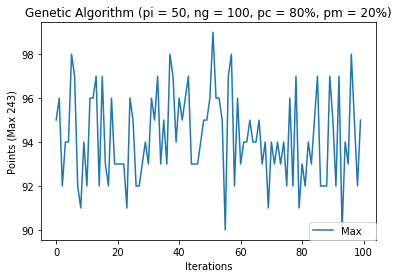

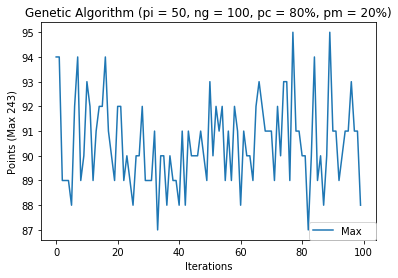

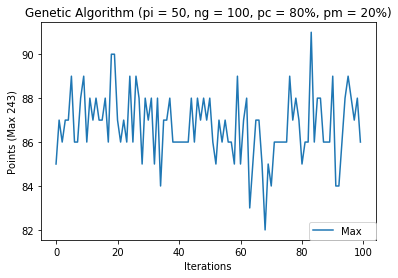

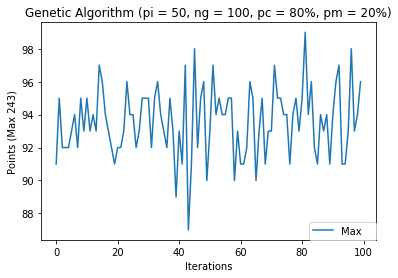

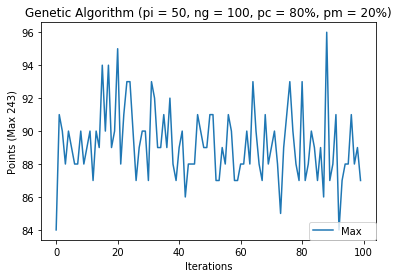

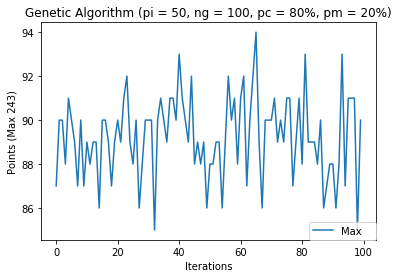

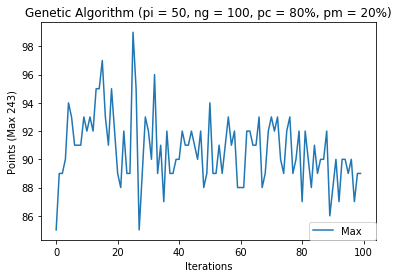

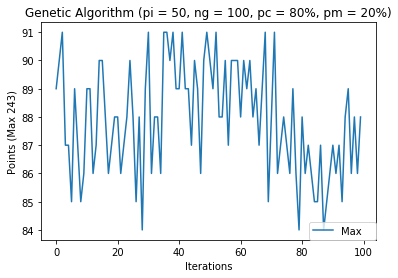

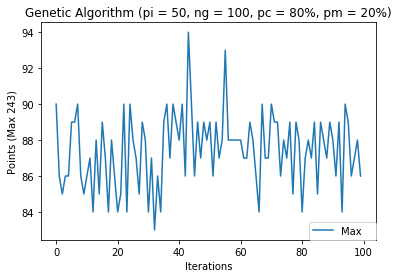

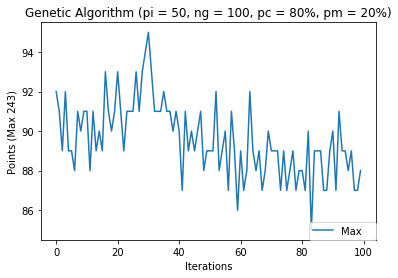

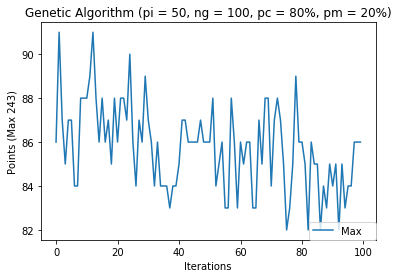

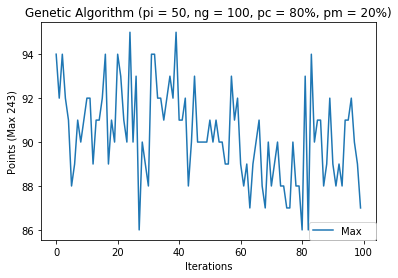

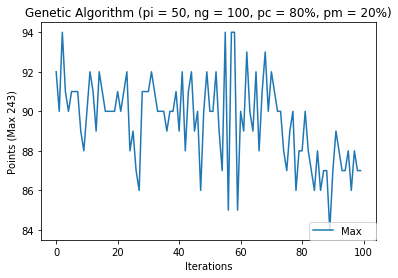

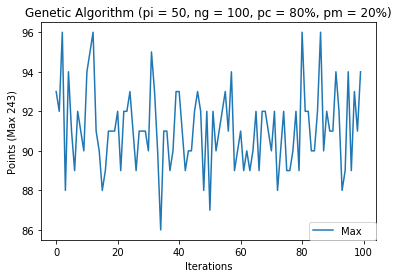

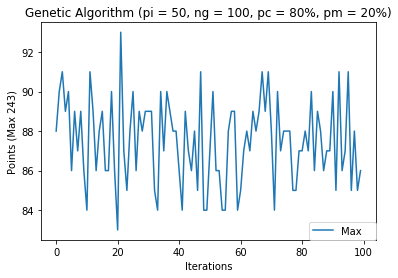

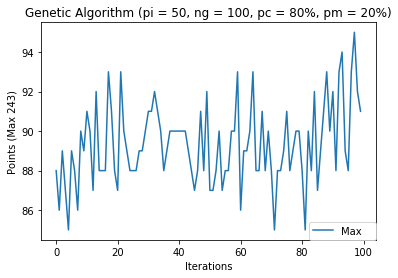

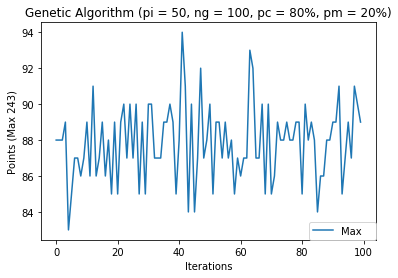

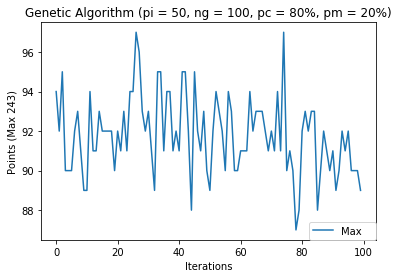

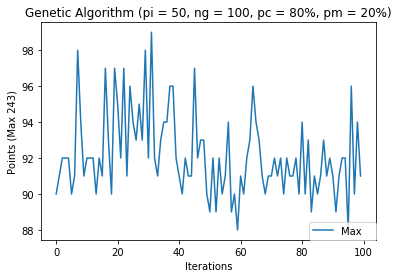

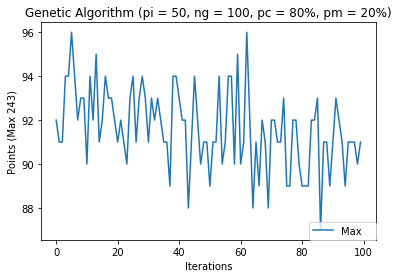

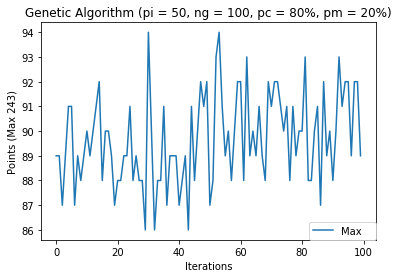

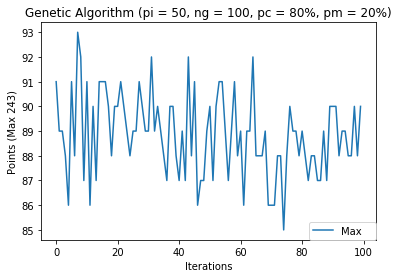

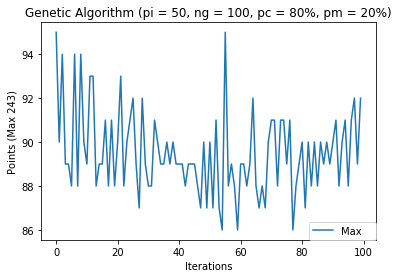

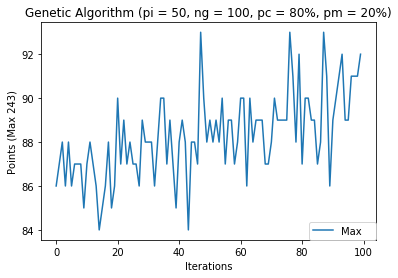

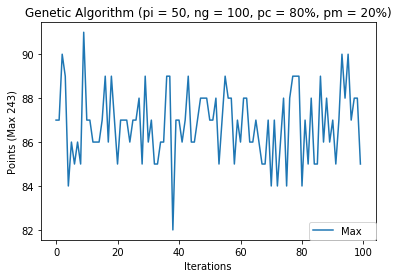

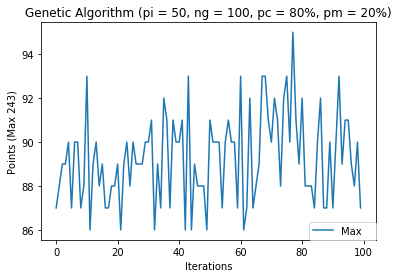

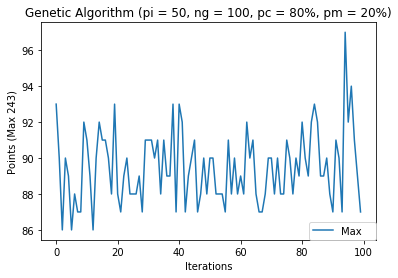

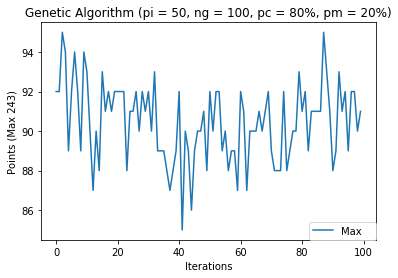

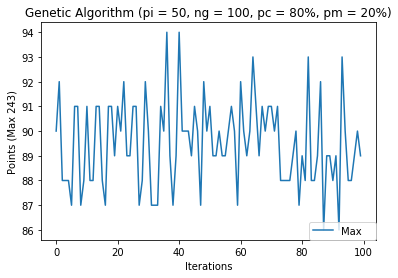

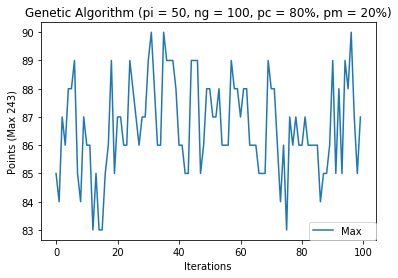

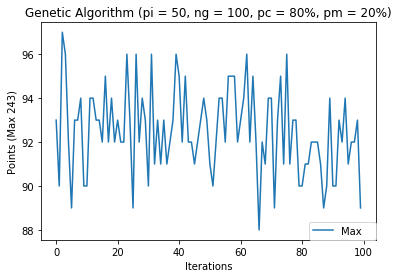

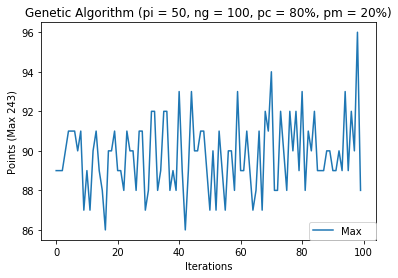

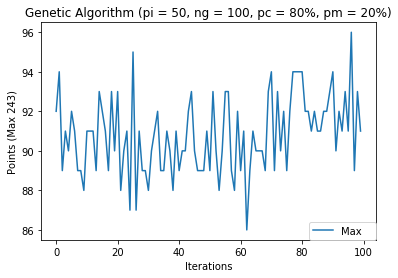

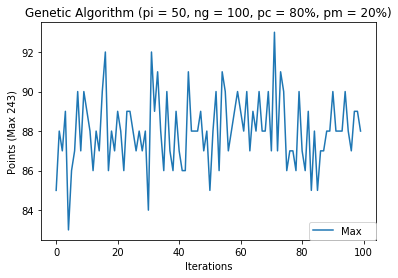

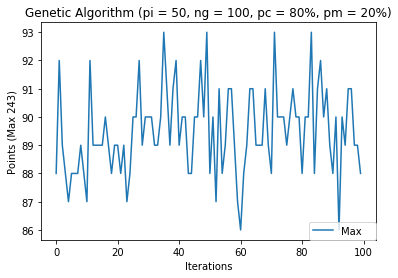

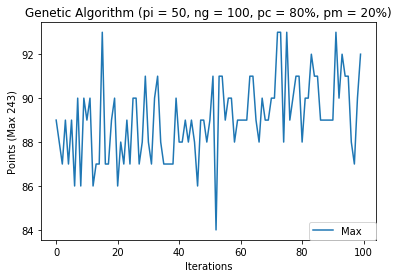

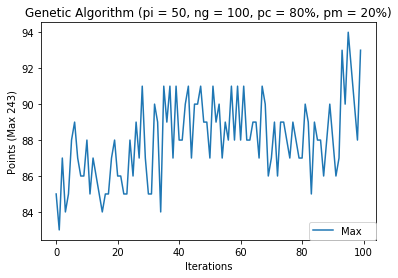

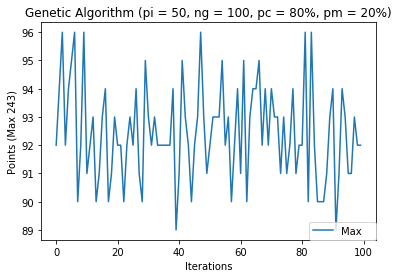

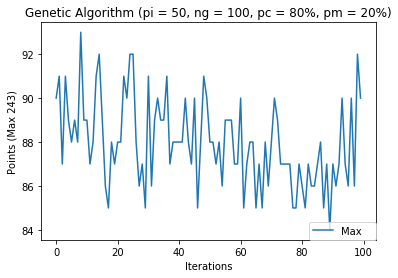

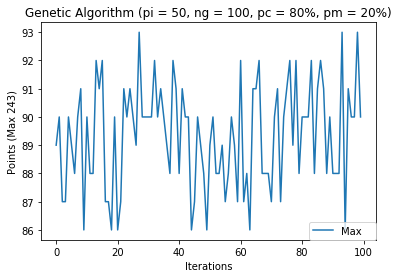

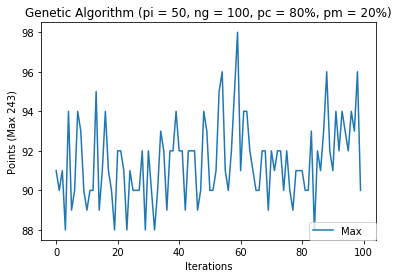

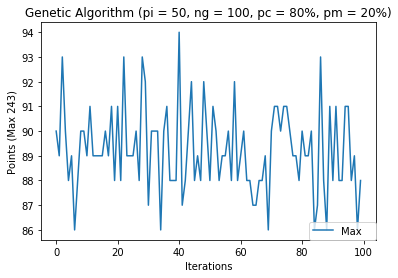

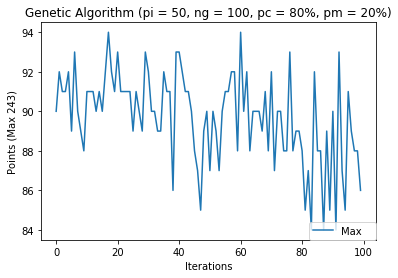

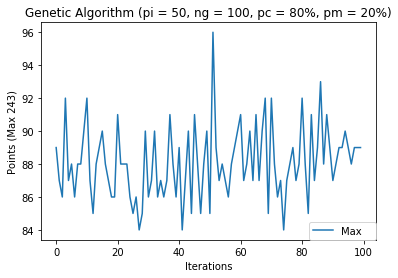

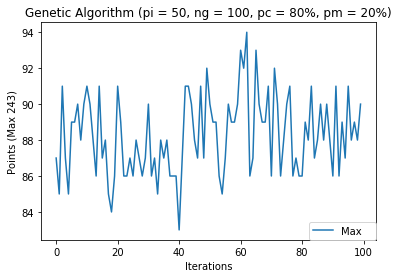

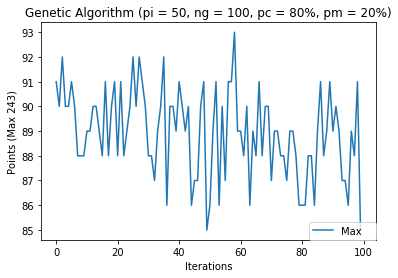

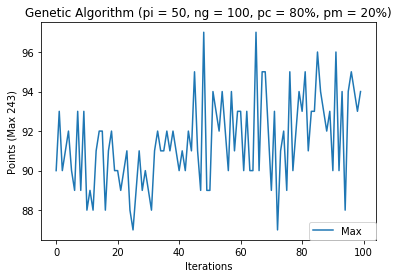

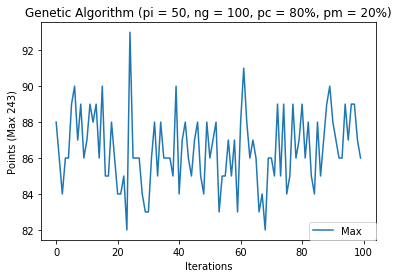

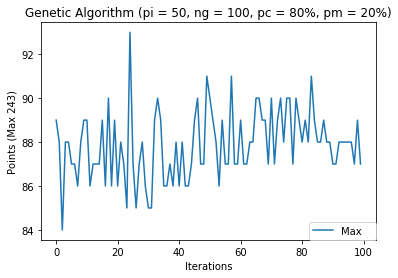

In [122]:
plt.subplot(111)
for i in range(len(randFixed)):
    plt.plot(allMax[i], label="Max")
    #plt.plot(allAvg[i], label="Avg")
    #plt.plot(allMin[i], label="Min")
    plt.legend(bbox_to_anchor=(0.8, 0.0, 0.2, .102), loc=3, ncol=1, mode="expand", borderaxespad=0.)
    plt.title('Genetic Algorithm (pi = 50, ng = 100, pc = 80%, pm = 20%)')
    plt.ylabel('Points (Max 243)')
    plt.xlabel('Iterations')
plt.show()